In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from voltagebudget import *
from fakespikes import util as fsutil

In [6]:
t = 0.3

k = 20
t_stim = 0.1
dt = 1e-4
w = 1e-4
a = 10000
ns, ts = util.k_spikes(t_stim, k, w, a=a, dt=dt, seed=None)
print(len(ts))

times = fsutil.create_times(t, dt)

20


In [33]:
N = 20
# w_in = 0.6e-9
# bias = 5e-3

f = 50 # 50
A = 20e-3
w_osc=.01e-9
r_b = 0.0

ns_e, ts_e, vs = neurons.lif(t, N,
                             ns, ts, 
                             w_in=(0.2e-9, 0.2e-9 / 10), bias=(5e-3, 5e-3 / 10),
                             f=f, A=A,
                             r_b=r_b,
                             time_step=dt)

Starting simulation at t=0. s for a duration of 300. ms
300. ms (100%) simulated in < 1s
Starting simulation at t=0. s for a duration of 300. ms
300. ms (100%) simulated in < 1s


In [34]:
m = np.logical_or(t_stim <= ts_e, ts_e <= (t_stim + 20e-3))
y_sigma = np.std(ts_e[m])
print(y_sigma)

0.082967102314


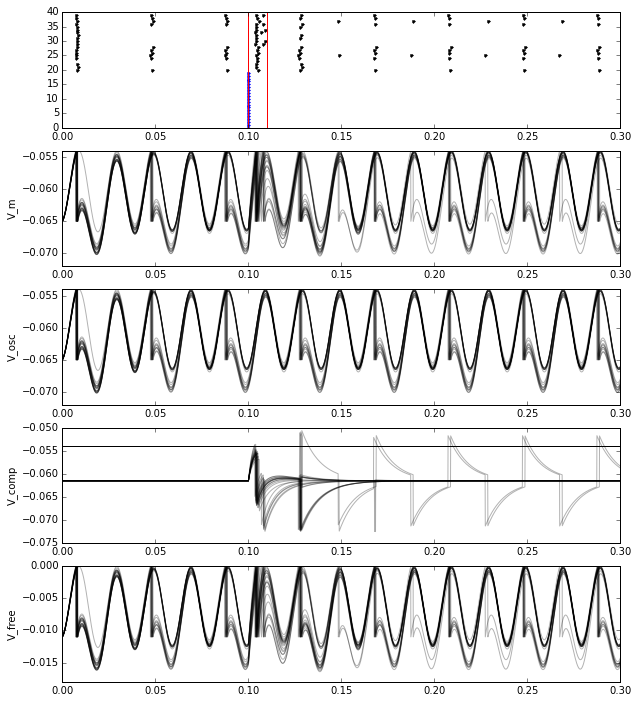

In [35]:
plt.figure(figsize=(10, 12))
plt.subplot(511)
plt.plot(ts, ns, '.b')
plt.plot(ts_e, ns_e + k, '.k')
plt.axvline(t_stim, color='red')
plt.axvline(t_stim + 10e-3, color='red')
plt.xlim(0, .3)

plt.subplot(512)
for j in range(20):
    plt.plot(times, vs['vm'][j, :], 'k', alpha=0.3);
plt.ylabel("V_m")

plt.subplot(513)
for j in range(20):
    plt.plot(times, vs['osc'][j, :], 'k', alpha=0.3);
plt.axhline(-54e-3, color='black')
plt.ylabel("V_osc")

plt.subplot(514)
for j in range(20):
    plt.plot(times, vs['comp'][j, :], 'k', alpha=0.3);
plt.axhline(-54e-3, color='black')
plt.ylabel("V_comp")

plt.subplot(515)
for j in range(20):
    plt.plot(times, vs['free'][j, :], 'k', alpha=0.3);
plt.axhline(0, color='black')
plt.ylabel("V_free")

In [ ]:
plt.figure(figsize=(10, 30))
for j in range(20):
    plt.subplot(50, 1, j)
    plt.plot(times, vs['vm'][j, :], 'k', alpha=1);
    plt.axis('off')

In [ ]:
# Now readout the 'E' response, in another LIF 

In [ ]:
N = 100
w_in = .1e-9
bias = 10e-6

f = 0
A = 0

r_b = 0.0
ns_out, ts_out, vs_out = neurons.lif(
    t, N, 
    ns_e, ts_e, 
    w_in, bias,
    f=f, A=A, 
    r_b=r_b,
    time_step=dt)

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(211)
plt.plot(ts, ns, '.b', alpha=0.3)
plt.plot(ts_e, ns_e + k, '.k', alpha=0.7)
plt.plot(ts_out, ns_out + k + k + 1, '.g', alpha=0.3, markersize=20)
plt.xlim(0.0, .3)

plt.subplot(212)
for j in range(20):
    plt.plot(times, vs_out['vm'][j, :], 'k', alpha=0.3);
# plt.xlim(0.09, .15)